# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [308]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
#import datetime
import os
import csv


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [309]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [310]:
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url
        
        

'http://api.openweathermap.org/data/2.5/weather?appid=8ef7960e4b4ab5cd6cc11c76b8226720&units=metric&q='

In [311]:
#response = requests.get(query_url +'georgetown').json()
#pprint(response)

In [312]:
# set up lists to hold reponse info

record_count = 1
#count_city = []
city_weather_data = []
print('Beginning Data Retrieval')
print('--------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name = response['name']
        city_country=response['sys']['country']
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloudiness = response['clouds']['all']
        city_wind_speed = response['wind']['speed']
        city_date = response['dt']
        #city_date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Data dictionary of weather data
        city_weather_data.append({'City':city_name, 
                          'Country': city_country, 
                          'Latitude': city_lat, 
                          'Longitude': city_lon,
                          'Max Temperature': city_max_temp,
                          'Humidity': city_humidity, 
                          'Cloudiness': city_cloudiness, 
                          'Wind Speed': city_wind_speed,
                          'Date': city_date})
        
        
        print(f'Processing Record {record_count}| {city}')
        record_count+= 1
    except:
        print(f'City not found. Skipping...')
        


Beginning Data Retrieval
--------------------------
Processing Record 1| bredasdorp
Processing Record 2| esperance
Processing Record 3| busselton
Processing Record 4| port lincoln
Processing Record 5| bluff
Processing Record 6| mar del plata
Processing Record 7| alakurtti
Processing Record 8| saskylakh
Processing Record 9| svetlogorsk
Processing Record 10| sao jose da coroa grande
Processing Record 11| ushuaia
Processing Record 12| ribeira grande
Processing Record 13| tura
Processing Record 14| dikson
Processing Record 15| topolobampo
Processing Record 16| hilo
City not found. Skipping...
Processing Record 17| hobart
Processing Record 18| mendoza
Processing Record 19| bambous virieux
Processing Record 20| hendek
Processing Record 21| kudahuvadhoo
Processing Record 22| hualmay
Processing Record 23| albany
City not found. Skipping...
Processing Record 24| eqbaliyeh
Processing Record 25| saint george
Processing Record 26| envira
Processing Record 27| torbay
Processing Record 28| saint-phi

Processing Record 244| nanortalik
Processing Record 245| olinda
City not found. Skipping...
Processing Record 246| san matias
Processing Record 247| fare
City not found. Skipping...
Processing Record 248| coihaique
Processing Record 249| muros
Processing Record 250| kincardine
Processing Record 251| vila velha
Processing Record 252| volksrust
Processing Record 253| bardiyah
Processing Record 254| nemuro
Processing Record 255| aschersleben
Processing Record 256| miyako
Processing Record 257| cayenne
Processing Record 258| onega
Processing Record 259| gamba
Processing Record 260| oranjemund
Processing Record 261| upernavik
City not found. Skipping...
Processing Record 262| portland
Processing Record 263| hoa binh
City not found. Skipping...
Processing Record 264| charters towers
Processing Record 265| port-cartier
Processing Record 266| basoko
Processing Record 267| maniitsoq
Processing Record 268| san patricio
Processing Record 269| chokurdakh
City not found. Skipping...
Processing Reco

Processing Record 475| popondetta
Processing Record 476| mantua
Processing Record 477| neiafu
Processing Record 478| prince rupert
City not found. Skipping...
Processing Record 479| galveston
Processing Record 480| suez
Processing Record 481| boden
Processing Record 482| beya
Processing Record 483| nyurba
Processing Record 484| chumikan
Processing Record 485| juneau
Processing Record 486| camacha
Processing Record 487| lancaster
Processing Record 488| atasu
Processing Record 489| belyy yar
Processing Record 490| san francisco
Processing Record 491| joao camara
Processing Record 492| norman wells
Processing Record 493| erzin
Processing Record 494| te anau
Processing Record 495| simao
Processing Record 496| pasaco
Processing Record 497| pisco
Processing Record 498| aswan
Processing Record 499| adre
Processing Record 500| acarau
Processing Record 501| bantogon
Processing Record 502| arman
Processing Record 503| merauke
Processing Record 504| corning
Processing Record 505| ahuimanu
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [313]:
# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    # Write the first row (column headers)
    csvwriter.writerows([city_weather_data])

In [314]:
#Convert weather data dictionary into a Data Frame
cities_df = pd.DataFrame(city_weather_data)
#cities_df = cities_df[['City','Country','Latitude','Max Temperature', 'Humidity','Cloudiness', 'Wind Speed']]
cities_df.head(10)

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Bredasdorp,ZA,-34.53,20.04,11.00,93,0,0.90,1595445107
1,Esperance,AU,-33.87,121.90,13.00,58,40,8.20,1595445107
2,Busselton,AU,-33.65,115.33,14.44,55,8,9.53,1595445108
3,Port Lincoln,AU,-34.73,135.87,9.60,81,2,3.94,1595445108
4,Bluff,NZ,-46.60,168.33,3.89,83,99,1.34,1595445108
5,Mar del Plata,AR,-38.00,-57.56,10.00,93,90,11.80,1595445108
6,Alakurtti,RU,66.97,30.35,17.78,68,100,2.24,1595445108
7,Saskylakh,RU,71.92,114.08,7.46,91,100,4.94,1595445109
8,Forsytheganj,BY,52.63,29.73,13.71,71,0,4.37,1595445109
9,São José da Coroa Grande,BR,-8.90,-35.15,25.45,71,72,4.03,1595445089


In [315]:
#type(city_date)
#Convert an integer time stamp date to a string format date '%Y-%m-%d %H:%M:%S' in Coordinated Universal Time.
#Not sure why it is datetime.dateime might have to global and local import datetime module
city_date = datetime.datetime.utcfromtimestamp(city_date).strftime('%m/%d/%y')
#cities_df['Date'] = city_date

In [316]:
cities_df.count()

City               568
Country            568
Latitude           568
Longitude          568
Max Temperature    568
Humidity           568
Cloudiness         568
Wind Speed         568
Date               568
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [317]:
#  Get the indices of cities that have humidity over 100%.

#create variable with True if humidity > 100
humidity_indx = cities_df[cities_df['Humidity'] > 100].index
#humidity_indx = cities_df[cities_df['Humidity'] == 100].index
humidity_indx  

Int64Index([], dtype='int64')

In [318]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_data_new = cities_df.drop(humidity_indx,inplace=False)
city_data_new.head()


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Bredasdorp,ZA,-34.53,20.04,11.00,93,0,0.90,1595445107
1,Esperance,AU,-33.87,121.90,13.00,58,40,8.20,1595445107
2,Busselton,AU,-33.65,115.33,14.44,55,8,9.53,1595445108
3,Port Lincoln,AU,-34.73,135.87,9.60,81,2,3.94,1595445108
4,Bluff,NZ,-46.60,168.33,3.89,83,99,1.34,1595445108


In [319]:
city_data_new.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.421197,13.703081,21.343838,69.878521,50.216549,3.569525,1.595445e+09
std,33.140910,93.077652,8.189290,20.457062,39.771135,2.450973,1.777598e+02
min,-54.800000,-175.200000,-5.000000,3.000000,0.000000,0.050000,1.595444e+09
25%,-7.857500,-70.267500,15.000000,58.000000,4.750000,1.797500,1.595445e+09
50%,22.885000,17.965000,22.750000,74.000000,43.000000,3.100000,1.595445e+09
75%,46.537500,98.535000,27.077500,85.000000,90.000000,4.702500,1.595445e+09
max,78.220000,179.320000,44.010000,100.000000,100.000000,13.400000,1.595445e+09


In [320]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
city_data_new.to_csv("./output_data/city_data2.csv",encoding='utf-8', index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

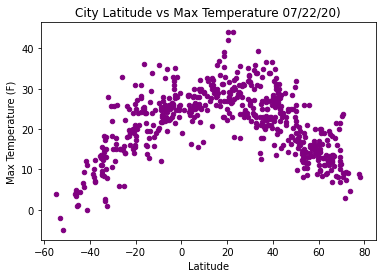

In [321]:
city_data_new.plot(kind='scatter', x='Latitude', y='Max Temperature', c='purple')
plt.title('City Latitude vs Max Temperature {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Images/LatitudeVsTemperature.png')


## Latitude vs. Humidity Plot

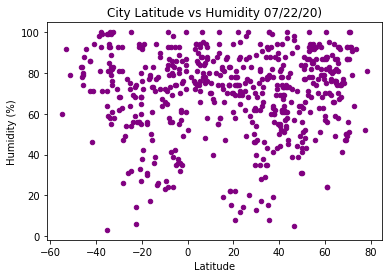

In [322]:
city_data_new.plot(kind='scatter', x='Latitude', y='Humidity', c='purple')
plt.title('City Latitude vs Humidity {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Images/LatitudeVsHumidity.png')

## Latitude vs. Cloudiness Plot

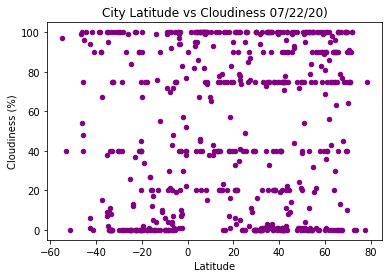

In [323]:
city_data_new.plot(kind='scatter', x='Latitude', y='Cloudiness', c='purple')
plt.title('City Latitude vs Cloudiness {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/LatitudeVsCloudiness.png')

## Latitude vs. Wind Speed Plot

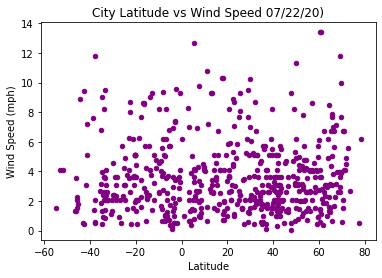

In [324]:
city_data_new.plot(kind='scatter', x='Latitude', y='Wind Speed', c='purple')
plt.title('City Latitude vs Wind Speed {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/LatitudeVsWind Speed.png')

## Linear Regression

In [345]:
# OPTIONAL: Create a function to create Linear Regression plots
#Linear regression equation Y = a + bX
def linear_regression_plot(df,title_name,y_column_name,y_label,file_name,xy):
    x_values = df['Latitude']
    y_values = df[y_column_name]
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regression_values = x_values * slope + intercept
    line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values,'r-')
    plt.annotate(line_equation,xy,fontsize=15,color='red')
    plt.xlabel('Latiude')
    plt.ylabel(y_label)  
    plt.title(title_name)
    
    print(f'The r-squared is: {rvalue}')
    plt.savefig(file_name)

In [346]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data_new.loc[city_data_new['Latitude'] >= 0]
southern_hemisphere_df = city_data_new.loc[city_data_new['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6964200268575903


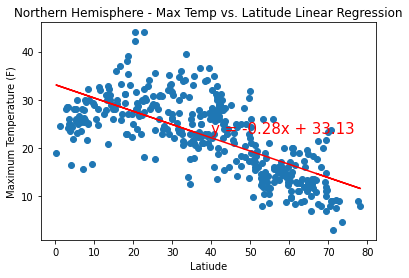

In [347]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temperature',
                       'Maximum Temperature (F)',
                       'Images/MaxTempVsLatLinRegress_northern.png',
                       (40,23))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8024576808284035


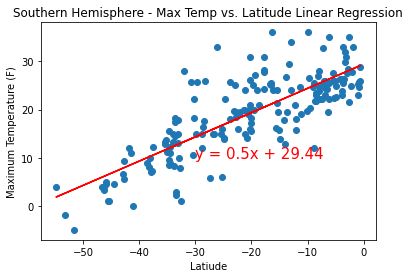

In [348]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temperature',
                       'Maximum Temperature (F)',
                       'Images/MaxTempVsLatLinRegress_southern.png',
                       (-30,10))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024166922563754384


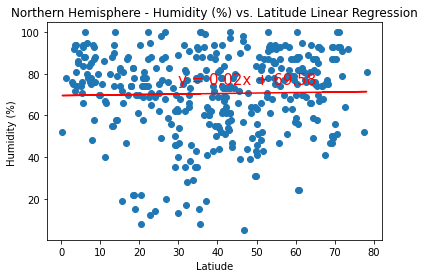

In [349]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
                       'Humidity',
                       'Humidity (%) ',
                       'Images/HumidityVsLatLinRegress_northern.png',
                       (30,75))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.2041448568362117


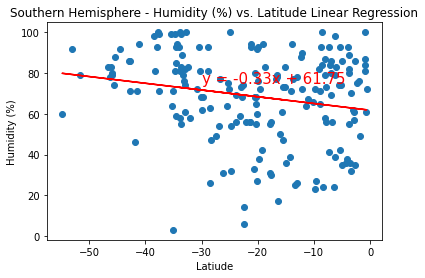

In [350]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
                       'Humidity',
                       'Humidity (%)',
                       'Images/HumidityVsLatLinRegress_southern.png',
                       (-30,75))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.02426695783037493


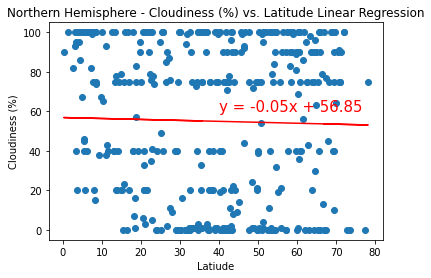

In [351]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
                       'Cloudiness',
                       'Cloudiness (%)',
                       'Images/CloudinessVsLatLinearRegress_Northern.png',
                       (40,60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1065820913322984


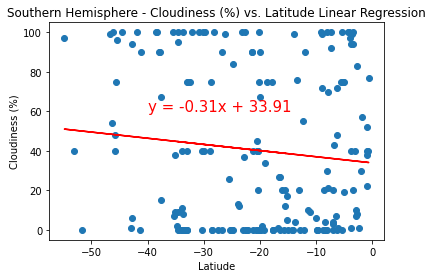

In [352]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
                       'Cloudiness',
                       'Cloudiness (%)',
                       'Images/CloudinessVsLatLinearRegress_southern.png',
                       (-40,60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022227187513188276


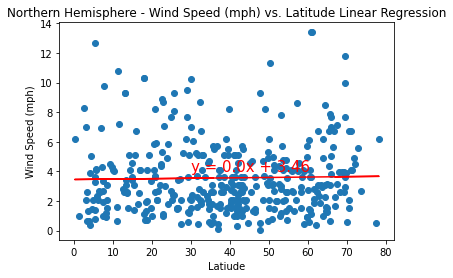

In [353]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
                       'Wind Speed',
                       'Wind Speed (mph)',
                       'Images/WindSpeedVsLinRegress_northern.png',
                       (30,4))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.050733226481780226


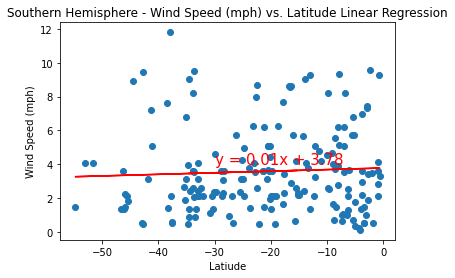

In [354]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
                       'Wind Speed',
                       'Wind Speed (mph)',
                       'Images/WindSpeedVsLinRegress_southern.png',
                       (-30,4))